数据集:Video Game Sales

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/vgsales.csv')
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

属性类别数: 11
总行数: 16598
示例数据:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


去除缺失项

In [3]:
print('原始数据行数:', len(data))
data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(data))

原始数据行数: 16598
将缺失部分剔除后数据行数: 16291


### 电子游戏市场分析
#### 1、受欢迎的游戏
根据“Rank”属性排序即可得到受欢迎的游戏排名情况。

In [4]:
data_rank = data[['Rank', 'Name']].sort_values(by='Rank')

top10

In [5]:
data_rank.head(10)

,Rank,Name
0,1,Wii Sports
1,2,Super Mario Bros.
2,3,Mario Kart Wii
3,4,Wii Sports Resort
4,5,Pokemon Red/Pokemon Blue
5,6,Tetris
6,7,New Super Mario Bros.
7,8,Wii Play
8,9,New Super Mario Bros. Wii
9,10,Duck Hunt


#### 2、受欢迎的游戏类型
通过统计相同游戏类型的全球销售额来进行分析受欢迎的游戏类型

<AxesSubplot:ylabel='Genre'>

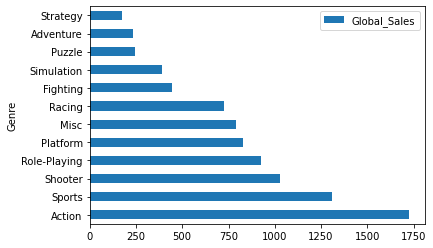

In [6]:
data_genre=data[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False)
data_genre.plot.barh()

可以看出动作、运动、射击类游戏比较受欢迎。

#### 3、受欢迎的游戏发布平台
通过统计相同游戏发布平台的全球销售额来进行分析受欢迎的游戏发布平台

In [7]:
data_platform=data[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False)
print('游戏发布平台总数：', len(data_platform))

游戏发布平台总数： 31


最受欢迎的前10个游戏发布平台为：

<AxesSubplot:ylabel='Platform'>

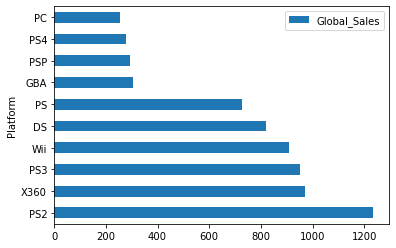

In [8]:
data_platform.head(10).plot.barh()

#### 4、受欢迎的游戏发行人

通过统计相同游戏发行人的全球销售额来进行分析受欢迎的游戏发行人。

In [9]:
data_publisher=data[['Publisher', 'Global_Sales']].groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False)
print('游戏发行人总数：', len(data_publisher))

游戏发行人总数： 576


最受欢迎的前10个游戏发行人为：

<AxesSubplot:ylabel='Publisher'>

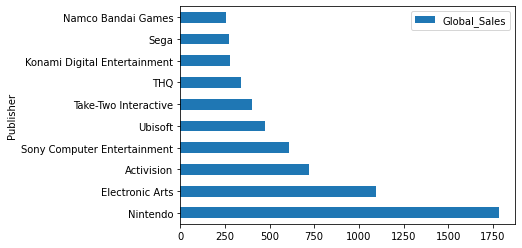

In [10]:
data_publisher.head(10).plot.barh()

#### 预测每年电子游戏销售额

首先统计每年电子游戏销售额信息。

<AxesSubplot:xlabel='Year'>

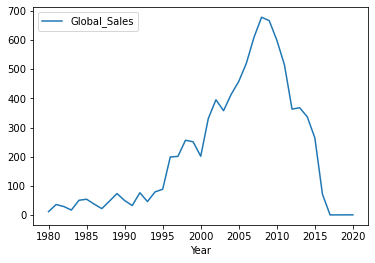

In [11]:
data_year=data[['Year', 'Global_Sales']].groupby('Year').sum().sort_values(by='Year')
data_year.plot()

In [12]:
data_year

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


从折线图和数据可以看出后三年的数据比较异常，所以在后续训练模型时直接去除掉这三年的数据。

In [13]:
data_year=data_year.drop([2016, 2017, 2020]).reset_index()

建立线性回归模型来预测每年电子游戏销售额。

In [14]:
x = data_year['Year']
y = data_year['Global_Sales']
x = np.array(x).reshape(-1, 1)
model=LinearRegression()
model.fit(x, y)

LinearRegression()

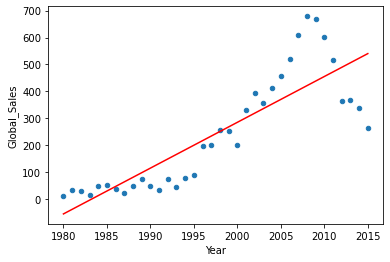

In [15]:
data_year.plot(kind="scatter", x='Year', y='Global_Sales')
plt.plot(x, model.predict(x), 'r-')
plt.show()

#### 可视化

#### 1、展示不同地区销售额占比

In [16]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [17]:
data_region=data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(ascending=False)

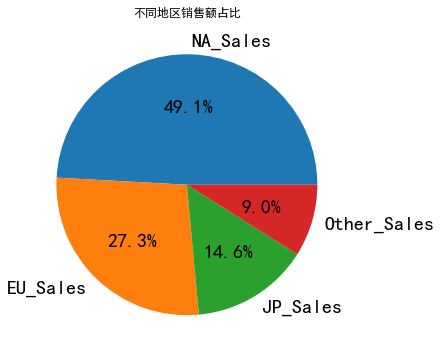

In [18]:
data_region.plot.pie(autopct='%0.1f%%', title='不同地区销售额占比', figsize=(6, 6), fontsize=20)
plt.ylabel('')
plt.show()

#### 2、展示不同地区不同游戏类型的销售额占比

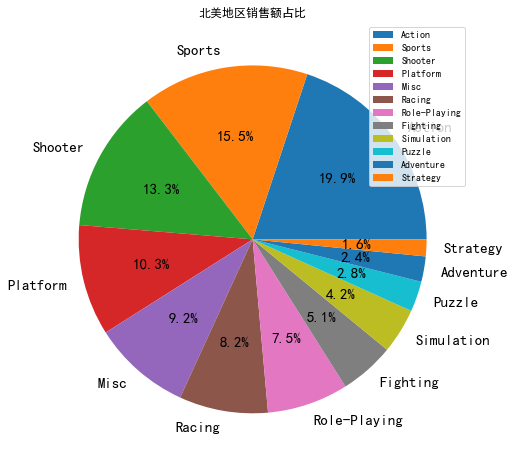

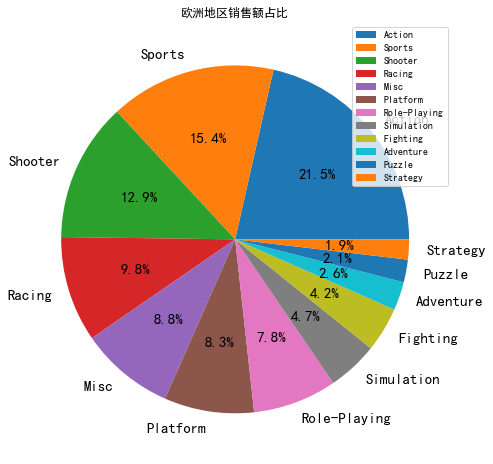

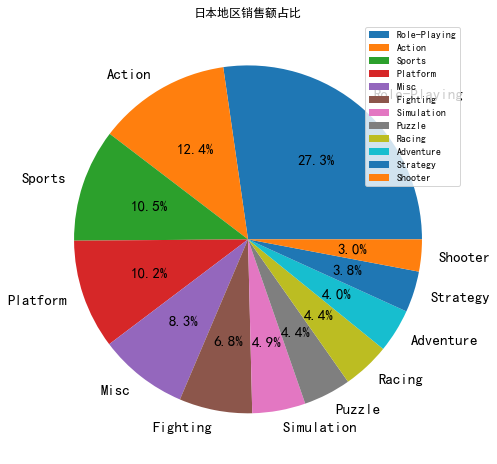

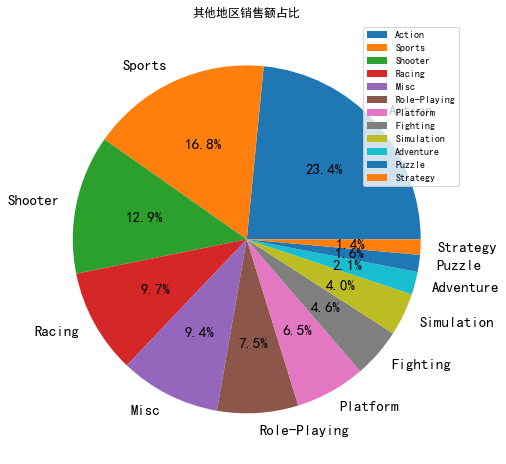

In [19]:
for region_name, region in [('北美', 'NA_Sales'), ('欧洲', 'EU_Sales'), ('日本', 'JP_Sales'), ('其他', 'Other_Sales')]:
    data_region = data[['Genre', region]].groupby('Genre').sum().sort_values(by=region, ascending=False)
    data_region.plot.pie(y=region, autopct='%0.1f%%', title=region_name+'地区销售额占比', figsize=(8, 8), fontsize=15)
    plt.ylabel('')
    plt.show()